Réalisons des régressions linéaires sur le data frame Eurostoxx 600 uniquement 

In [4]:
pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
# Importer les bibliothèques nécessaires 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [7]:
# Créons un data frame à partir du CSV 

chemin_fichier = '../Nettoyage des données/df_Eurostoxx_clean.csv'
df_STX600 = pd.read_csv(chemin_fichier)
df_STX600.head()   

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,1COV,1COV.DE,Covestro AG,Eurostoxx,2021,2021-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,15.903000,7.696000,15.571000,2.528000,1.30,0.225463,10.161605,32.848233,15.531661,NaN
1,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2021,2021-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.909659,5.219201,7.063730,0.102285,0.05,0.035485,9.464304,1.959783,2.380952,NaN
2,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2022,2022-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.963691,5.579841,7.257085,0.102669,0.05,0.016834,9.267322,1.839999,2.403846,-0.952381
3,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2023,2023-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.096701,5.887074,7.740306,0.188507,0.05,0.024756,7.687893,3.202049,2.793296,-13.942308
4,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2024,2024-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.064254,6.093970,8.130073,0.412959,0.05,0.013964,5.235007,6.776518,4.132231,-32.402235


In [8]:
chemin_fichier_2 = '../Collecte de données/country_risk_premiums.csv'
df_damodaran = pd.read_csv(chemin_fichier_2)
df_damodaran.head()

,Country,Adj. Default Spread,Equity Risk Premium,Country Risk Premium,Corporate Tax Rate,Moody's rating
0,Abu Dhabi,0.49,4.99,0.66,15.00,Aa2
1,Albania,3.56,9.13,4.80,15.00,Ba3
2,Algeria,2.98,8.35,4.02,15.00,NR
3,Andorra (Principality of),1.58,6.46,2.13,18.98,Baa1
4,Angola,6.44,13.01,8.68,25.00,B3


In [9]:
# Nettoyage du DataFrame Damodaran
df_damodaran['Country'] = df_damodaran['Country'].str.strip()
df_damodaran['Country'] = df_damodaran['Country'].str.replace('\s+', ' ', regex=True) # Remplacer les multiples espaces par un seul

# Rendre la colonne 'Country' l'index pour faciliter la jointure
df_damodaran.set_index('Country', inplace=True) 

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/cd/vx4tz04x1zd9kslwkhpqww3m0000gn/T/ipykernel_99498/1190902940.py:3: SyntaxWarning: invalid escape sequence '\s'
  df_damodaran['Country'] = df_damodaran['Country'].str.replace('\s+', ' ', regex=True) # Remplacer les multiples espaces par un seul


In [11]:
df_analyse_STX = df_STX600.drop("Croissance de l'EPS (en %)", axis = 1)
df_analyse_STX

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,NetIncomeBN,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut
0,1COV,1COV.DE,Covestro AG,Eurostoxx,2021,2021-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,1.616000,15.903000,7.696000,15.571000,2.528000,1.30,0.225463,10.161605,32.848233,15.531661
1,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2021,2021-12-31,Communication Services,Telecom Services,Germany,0.410,...,0.370022,3.909659,5.219201,7.063730,0.102285,0.05,0.035485,9.464304,1.959783,2.380952
2,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2022,2022-12-31,Communication Services,Telecom Services,Germany,0.410,...,0.367328,3.963691,5.579841,7.257085,0.102669,0.05,0.016834,9.267322,1.839999,2.403846
3,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2023,2023-12-31,Communication Services,Telecom Services,Germany,0.410,...,0.314950,4.096701,5.887074,7.740306,0.188507,0.05,0.024756,7.687893,3.202049,2.793296
4,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2024,2024-12-31,Communication Services,Telecom Services,Germany,0.410,...,0.212764,4.064254,6.093970,8.130073,0.412959,0.05,0.013964,5.235007,6.776518,4.132231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,ZAL,ZAL.DE,Zalando SE,Eurostoxx,2024,2024-12-31,Consumer Cyclical,Internet Retail,Germany,1.849,...,0.251100,10.572500,2.665300,7.983900,1.725500,0.00,0.291167,2.375030,64.739429,0.000000
1202,ZURN,ZURN.SW,Zurich Insurance Group AG Ltd,Eurostoxx,2021,2021-12-31,Financial Services,Insurance - Diversified,Switzerland,0.388,...,5.202000,69.539000,29.121000,398.907000,15.109000,20.00,0.095858,7.480694,51.883520,57.159188
1203,ZURN,ZURN.SW,Zurich Insurance Group AG Ltd,Eurostoxx,2022,2022-12-31,Financial Services,Insurance - Diversified,Switzerland,0.388,...,3.964000,44.763000,25.683000,335.412000,15.715000,22.00,0.089025,8.855528,61.188335,82.366155
1204,ZURN,ZURN.SW,Zurich Insurance Group AG Ltd,Eurostoxx,2023,2023-12-31,Financial Services,Insurance - Diversified,Switzerland,0.388,...,4.351000,78.098000,24.860000,361.382000,15.455000,24.00,0.077463,5.571205,62.168142,80.106809


In [12]:
df_fusion = pd.merge(
    df_analyse_STX, 
    df_damodaran, 
    left_on='Country', 
    right_index=True, 
    how='left' 
)

print("Nombre d'observations dans le data frame", len(df_fusion))

Nombre d'observations dans le data frame 1206


In [14]:
#Vérification des données du data frame fusionné
df_fusion.isna().sum().sum()

np.int64(0)

Le dataframe ne contient pas de na et contient toutes les observations du SP500. Commençons par regarder la corrélation entre les variables potentiellement utilisables

In [15]:
#Matrice  contenant les variables explicatives 

colonnes = [
    'AnneeFiscale', 'Beta', 'MarketCapitalizationBN',
    'SharesOutstandingMn', 'ROE_calcule', 'ROA_calcule',
    'DebtToEquity_calcule', 'EPS', 'EOD_Close_Price', 'NetIncomeBN',
    'TotalRevenueBN', 'TotalEquityBN', 'TotalAssetsBN', 'TotalDebtBN',
    'Dividendes_Annuels', 'Annual_Volume_Traded_BN', '%MargeNette',
    '%Gearing', '%PayOut', 'Equity Risk Premium', 'Country Risk Premium', 'Corporate Tax Rate'
]

matrice_corr_cols = df_fusion[colonnes].corr()

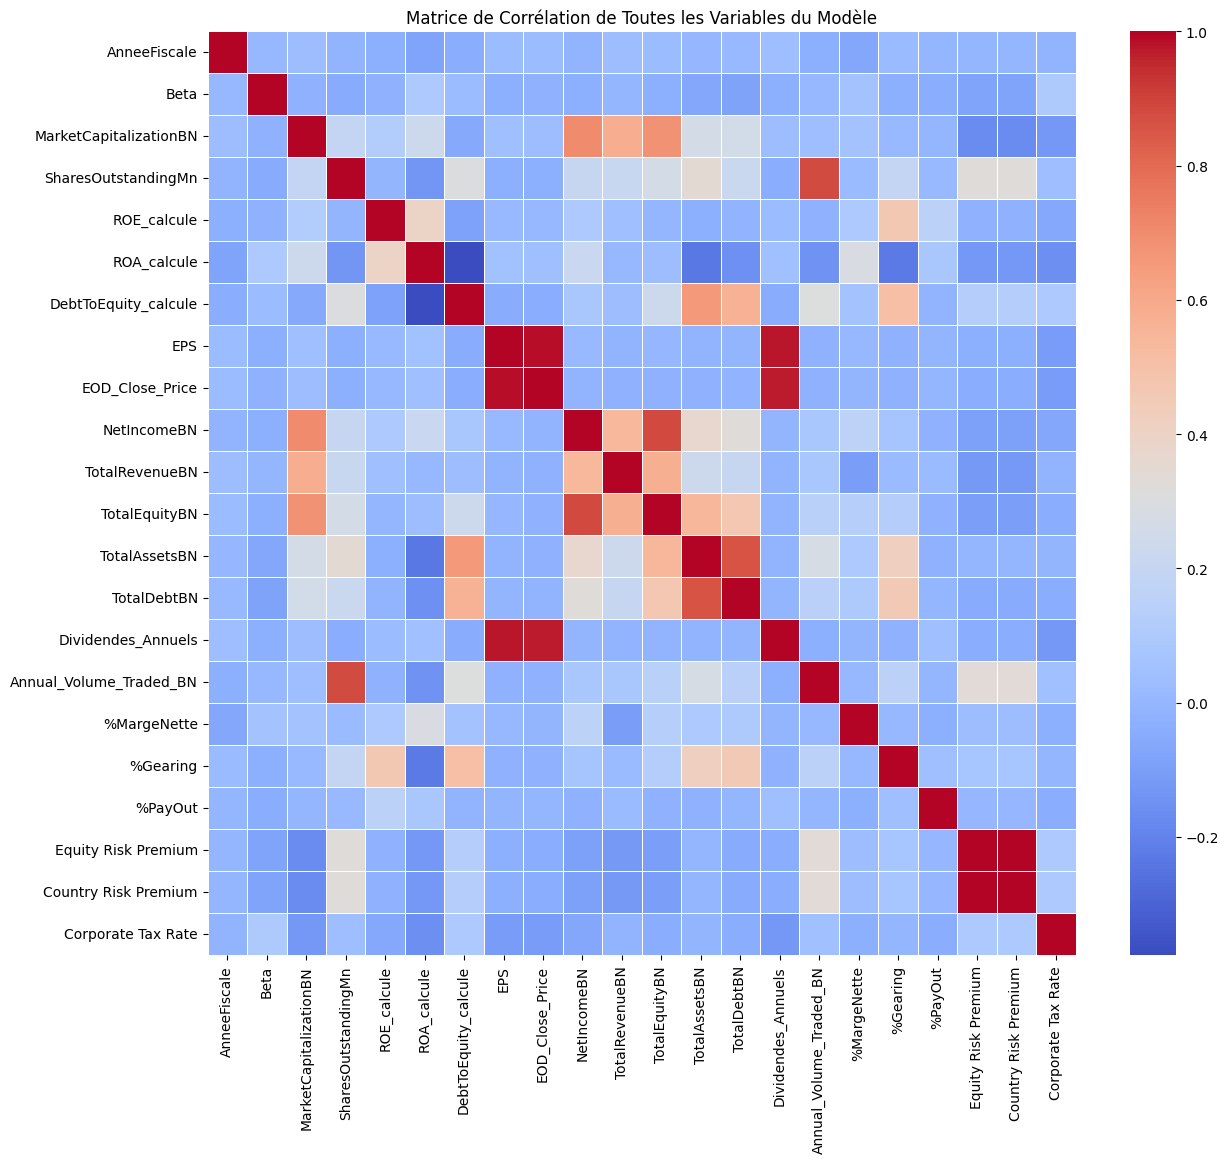

In [16]:
plt.figure(figsize=(14, 12)) 
sns.heatmap(
    matrice_corr_cols, 
    annot=False,  
    cmap='coolwarm', 
    fmt=".2f",
    linewidths=.5
)
plt.title('Matrice de Corrélation de Toutes les Variables du Modèle')
plt.show()

Par rapport à l'analyse menée pour le S&P500, les entreprises de l'Eurostoxx ne sont pas toutes dans le même pays, ce qui nous permet 

In [22]:
modele_1 = """
PER_calcule ~ Beta +
            AnneeFiscale + 
            MarketCapitalizationBN + 
            SharesOutstandingMn + 
            ROE_calcule + 
            ROA_calcule + 
            DebtToEquity_calcule + 
            EPS+ 
            EOD_Close_Price + 
            NetIncomeBN + 
            TotalRevenueBN + 
            TotalEquityBN + 
            TotalAssetsBN+ 
            TotalDebtBN + 
            Dividendes_Annuels + 
            Annual_Volume_Traded_BN + 
            Q("%MargeNette") + 
            Q("%Gearing") +
            Q("%PayOut") + 
            Q("Equity Risk Premium") + 
            Q("Corporate Tax Rate")
"""

modele_1 = smf.ols(formula=modele_1, data=df_fusion).fit()

print("\n--- Résultat de la Régression (Modèle Macro-Financier) ---")
print(modele_1.summary())


--- Résultat de la Régression (Modèle Macro-Financier) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     27.58
Date:                Sat, 20 Dec 2025   Prob (F-statistic):           2.34e-87
Time:                        18:16:55   Log-Likelihood:                -4282.7
No. Observations:                1206   AIC:                             8609.
Df Residuals:                    1184   BIC:                             8722.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [24]:
modele_2 = """
PER_calcule ~ Beta +
            AnneeFiscale + 
            MarketCapitalizationBN + 
            SharesOutstandingMn + 
            ROE_calcule + 
            ROA_calcule + 
            DebtToEquity_calcule + 
            EPS+ 
            EOD_Close_Price + 
            NetIncomeBN + 
            TotalRevenueBN + 
            TotalEquityBN + 
            TotalAssetsBN+ 
            TotalDebtBN + 
            Dividendes_Annuels + 
            Annual_Volume_Traded_BN + 
            Q("%MargeNette") + 
            Q("%Gearing") +
            Q("%PayOut")
"""

modele_2 = smf.ols(formula=modele_2, data=df_fusion).fit()

print("\n--- Résultat de la Régression (Modèle Macro-Financier) ---")
print(modele_2.summary())


--- Résultat de la Régression (Modèle Macro-Financier) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     29.89
Date:                Sat, 20 Dec 2025   Prob (F-statistic):           4.02e-87
Time:                        18:20:24   Log-Likelihood:                -4286.9
No. Observations:                1206   AIC:                             8614.
Df Residuals:                    1186   BIC:                             8716.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------